In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
from google.colab import files
files.upload();

Saving vgames2.csv to vgames2 (4).csv


In [3]:
df = pd.read_csv('vgames2.csv',index_col=0)
df.shape

(16598, 9)

In [4]:
df.isnull().sum()

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [5]:
df_copy = df.copy()

In [6]:
df_copy.sample(7)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
8666,Wheel of Fortune,N64,1997.0,Misc,Take-Two Interactive,0.2,0.05,0,0
689,Section 8,PC,2009.0,Shooter,SouthPeak Games,0.01,0.01,0,0
5972,Gallop Racer 2003: A New Breed,PS2,2002.0,Sports,Zoo Digital Publishing,0.04,0.03,0.12,0.01
12165,Wizardry: Tale of the Forsaken Land,PS2,2001.0,Role-Playing,Ubisoft,0.04,0.03,0,0.01
16220,LEGO Pirates of the Caribbean: The Video Game,Wii,2011.0,Action,Disney Interactive Studios,0.76,0.72,0,0.16
9041,World Tour Soccer 2005,PS2,2004.0,Sports,Sony Computer Entertainment,0.08,0.06,0,0.02
9471,Power Pro Kun Pocket 1+2,GBA,2004.0,Sports,Konami Digital Entertainment,0,0,0.14,0


In [7]:
df_copy.isnull().sum()
df_copy = df_copy.dropna()

In [8]:
df_copy.duplicated().sum()

0

In [9]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16241 entries, 1 to 16598
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16241 non-null  object 
 1   Platform     16241 non-null  object 
 2   Year         16241 non-null  float64
 3   Genre        16241 non-null  object 
 4   Publisher    16241 non-null  object 
 5   NA_Sales     16241 non-null  object 
 6   EU_Sales     16241 non-null  object 
 7   JP_Sales     16241 non-null  object 
 8   Other_Sales  16241 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.2+ MB


In [10]:
df_copy.Year = df_copy.Year.astype(int)


In [11]:
df_copy[df_copy.Year ==2020]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
6907,Imagine: Makeup Artist,DS,2020,Simulation,Ubisoft,0.27,0K,0,0.02


In [12]:
df_copy.Year.describe()
delete_index = df_copy[df_copy.Year<1900].index
df_copy = df_copy.drop(index=delete_index)

In [13]:
def convert(x):
  if 'K' in x:
    return float(x.replace('K',''))/1000
  if 'M' in x:
    return float(x.replace('M',''))
  return x

In [14]:
df_copy['NA_Sales'] = df_copy['NA_Sales'].apply(convert)
df_copy['EU_Sales'] = df_copy['EU_Sales'].apply(convert)
df_copy['JP_Sales'] = df_copy['JP_Sales'].apply(convert)
df_copy['Other_Sales'] = df_copy['Other_Sales'].apply(convert)

In [15]:
df_copy.NA_Sales = df_copy.NA_Sales.astype(float)
df_copy.EU_Sales = df_copy.EU_Sales.astype(float)
df_copy.JP_Sales = df_copy.JP_Sales.astype(float)
df_copy.Other_Sales = df_copy.Other_Sales.astype(float)

In [16]:
df_copy['Global_Sales'] = df_copy['NA_Sales'] + df_copy['EU_Sales'] + df_copy['JP_Sales'] + df_copy['Other_Sales']
df_copy.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
1,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04
2,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
4,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25


In [17]:
df_copy.insert(0,'Rank',df_copy['Global_Sales'].rank(ascending=False))

In [18]:
df_copy.head(3)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
1,13350.5,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.0,0.00,0.00,0.04
2,7811.0,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.0,0.00,0.01,0.18
3,14908.0,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.0,0.02,0.00,0.02


In [19]:
df_copy['Rank'] = df_copy['Rank'].astype(int)

In [20]:
df_copy.groupby('Genre')[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].mean()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,0.265332,0.158872,0.048273,0.056925
Adventure,0.080166,0.050095,0.040973,0.013165
Fighting,0.265513,0.120290,0.104210,0.043546
Misc,0.235961,0.124285,0.062065,0.043411
Platform,0.511514,0.230520,0.149387,0.059133
Puzzle,0.216846,0.090305,0.100699,0.022204
Racing,0.292448,0.193714,0.045840,0.063052
Role-Playing,0.210762,0.121009,0.230782,0.037550
Shooter,0.450229,0.242319,0.029448,0.079511


In [21]:
df_gen_sales = df_copy[['Genre','NA_Sales','EU_Sales','JP_Sales','Other_Sales']]
Gen_sale = df_gen_sales.groupby('Genre').sum().reset_index()
Gen_sale

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Action,855.96,512.52,155.73,183.64
1,Adventure,101.33,63.32,51.79,16.64
2,Fighting,220.11,99.72,86.39,36.10
3,Misc,394.29,207.68,103.71,72.54
4,Platform,442.46,199.40,129.22,51.15
5,Puzzle,121.00,50.39,56.19,12.39
6,Racing,353.57,234.20,55.42,76.23
7,Role-Playing,307.08,176.31,336.25,54.71
8,Shooter,570.89,307.26,37.34,100.82
9,Simulation,181.04,112.68,63.46,31.24


In [22]:
Gen_sales = pd.melt(Gen_sale,id_vars=['Genre'], value_vars=['NA_Sales','EU_Sales','JP_Sales','Other_Sales'],var_name='Area',value_name='Total_price')
Gen_sales.head()

,Genre,Area,Total_price
0,Action,NA_Sales,855.96
1,Adventure,NA_Sales,101.33
2,Fighting,NA_Sales,220.11
3,Misc,NA_Sales,394.29
4,Platform,NA_Sales,442.46


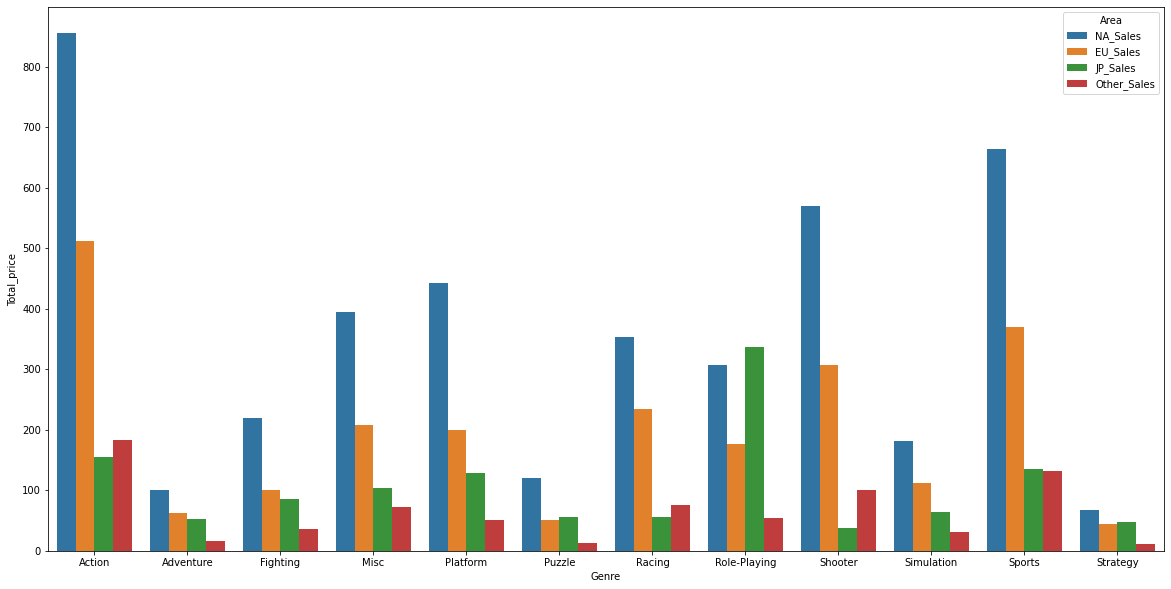

In [23]:
plt.figure(figsize=(20,10))
sns.barplot(x='Genre', y='Total_price',hue='Area', data=Gen_sales)

In [24]:
Gen_Na = df_copy[['Genre','NA_Sales']]
Gen_Na = Gen_Na.groupby('Genre')['NA_Sales'].sum().sort_values(ascending=False)
Gen_Na = pd.DataFrame(Gen_Na).reset_index()

Gen_EU = df_copy[['Genre','EU_Sales']]
Gen_EU = Gen_EU.groupby('Genre')['EU_Sales'].sum().sort_values(ascending=False)
Gen_EU = pd.DataFrame(Gen_EU).reset_index()

Gen_JP = df_copy[['Genre','JP_Sales']]
Gen_JP = Gen_JP.groupby('Genre')['JP_Sales'].sum().sort_values(ascending=False)
Gen_JP = pd.DataFrame(Gen_JP).reset_index()

Gen_else = df_copy[['Genre','Other_Sales']]
Gen_else = Gen_else.groupby('Genre')['Other_Sales'].sum().sort_values(ascending=False)
Gen_else = pd.DataFrame(Gen_else).reset_index()


In [25]:
# plt.figure(figsize=(30,30));
# fig, axes = plt.subplots(2, 2)
# sns.barplot(x='Genre',y='NA_Sales',data=Gen_Na,ax=axes[0,0]);
# sns.barplot(x='Genre',y='EU_Sales',data=Gen_EU,ax=axes[0,1]);
# sns.barplot(x='Genre',y='JP_Sales',data=Gen_JP,ax=axes[1,0]);
# sns.barplot(x='Genre',y='Other_Sales',data=Gen_else,ax=axes[1,1]);
# plt.xticks(rotation=90)

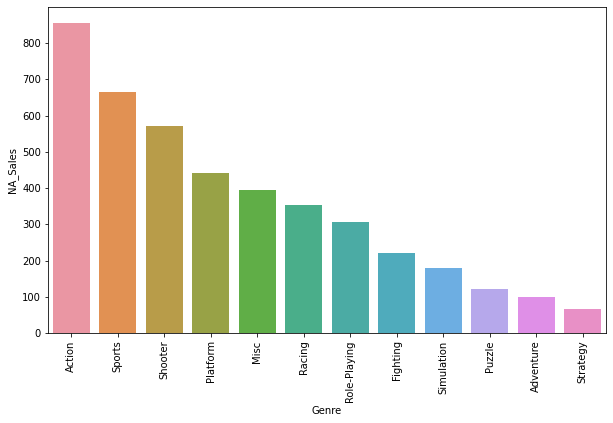

In [26]:
plt.figure(figsize=(10,6))
sns.barplot(x='Genre',y='NA_Sales',data=Gen_Na);
plt.xticks(rotation=90);

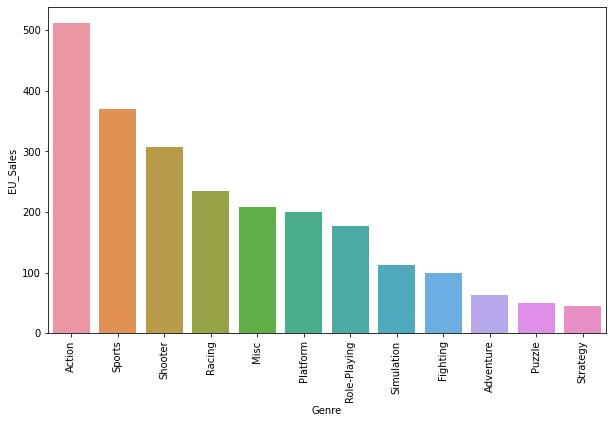

In [27]:
plt.figure(figsize=(10,6))
sns.barplot(x='Genre',y='EU_Sales',data=Gen_EU);
plt.xticks(rotation=90);

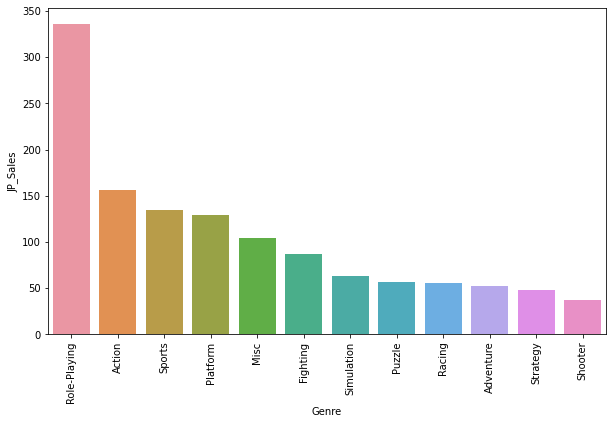

In [28]:
plt.figure(figsize=(10,6))
sns.barplot(x='Genre',y='JP_Sales',data=Gen_JP);
plt.xticks(rotation=90);

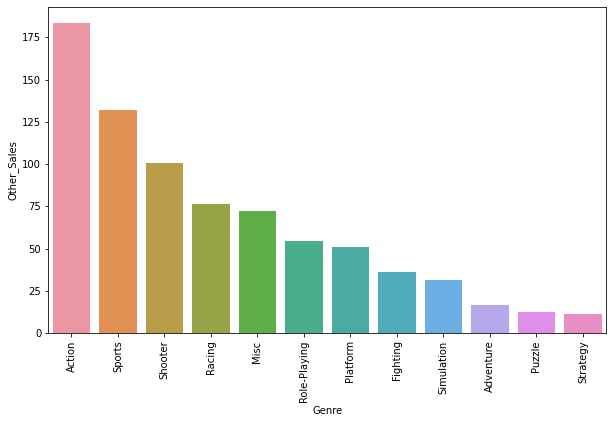

In [29]:
plt.figure(figsize=(10,6))
sns.barplot(x='Genre',y='Other_Sales',data=Gen_else);
plt.xticks(rotation=90);

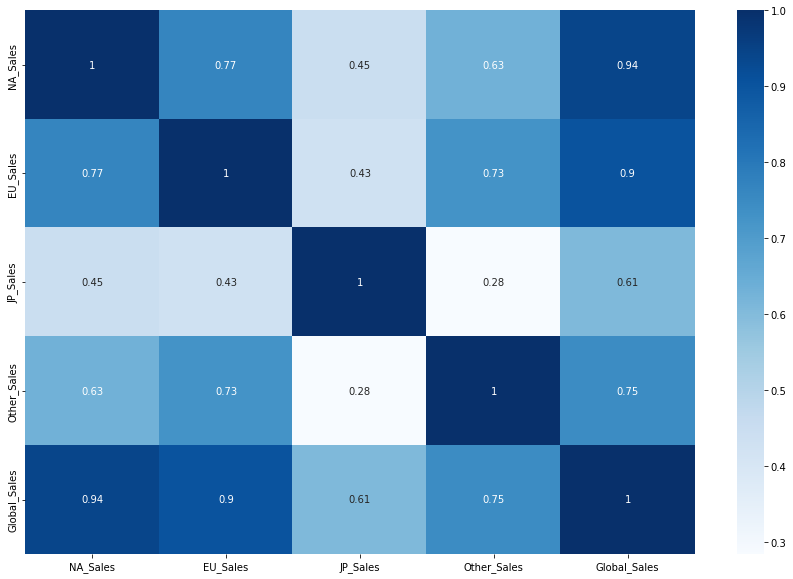

In [30]:
df_sales = df_copy[['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']]

plt.figure(figsize=(15,10))
sns.heatmap(df_sales.corr(), cmap='Blues', annot=True)

In [31]:
year_df = df_copy.groupby('Year', as_index=False).sum().sort_values(by='Year',ascending=False)
year_df = year_df.drop('Rank', axis=1)
year_df.head()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
38,2020,0.27,0.00,0.00,0.02,0.29
37,2017,0.00,0.00,0.05,0.00,0.05
36,2016,21.36,24.65,13.25,7.09,66.35
35,2015,101.82,96.90,33.21,29.65,261.58
34,2014,130.51,125.09,39.07,39.65,334.32


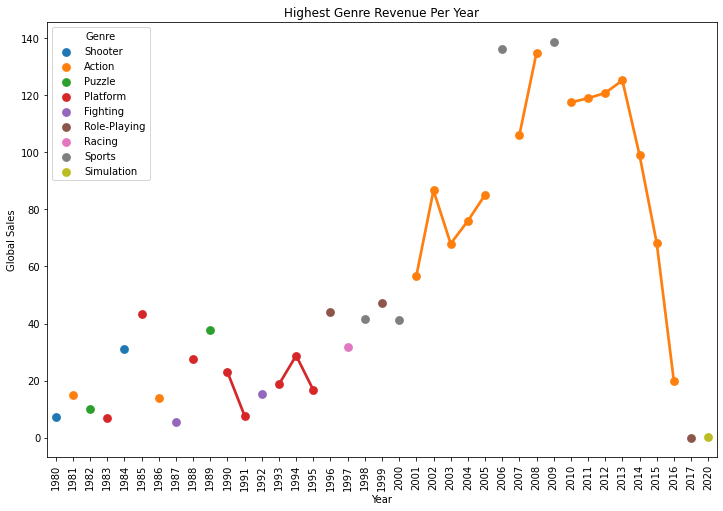

In [78]:
table = df_copy.pivot_table('Global_Sales', index='Genre',columns='Year',aggfunc='sum')
genres = table.idxmax()
sales = table.max()
years = table.columns.astype(int)
data = pd.concat([genres,sales], axis=1)
data.columns = ['Genre', 'Global Sales']

plt.figure(figsize=(12,8))
ax = sns.pointplot(y = 'Global Sales',x=years,hue='Genre',data=data, size=15)
ax.set(title='Highest Genre Revenue Per Year')
plt.xticks(rotation=90);
plt.show();

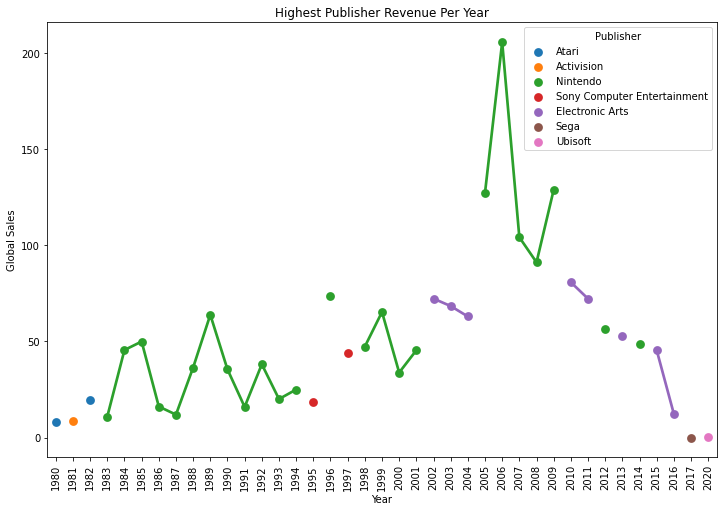

In [79]:
table = df_copy.pivot_table('Global_Sales', index='Publisher',columns='Year',aggfunc='sum')
publishers = table.idxmax()
sales = table.max()
years = table.columns.astype(int)
data = pd.concat([publishers,sales], axis=1)
data.columns = ['Publisher', 'Global Sales']

plt.figure(figsize=(12,8))
ax = sns.pointplot(y = 'Global Sales',x=years,hue='Publisher',data=data, size=15)
ax.set(title='Highest Publisher Revenue Per Year')
plt.xticks(rotation=90);
plt.show();

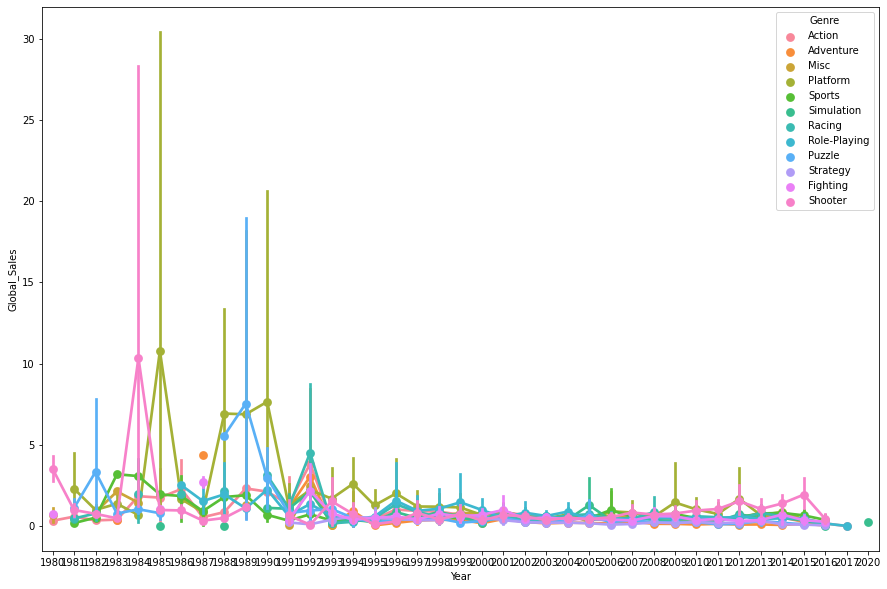

In [62]:
plt.figure(figsize=(15,10))
sns.pointplot(x='Year',y='Global_Sales',hue='Genre',data=df_copy)

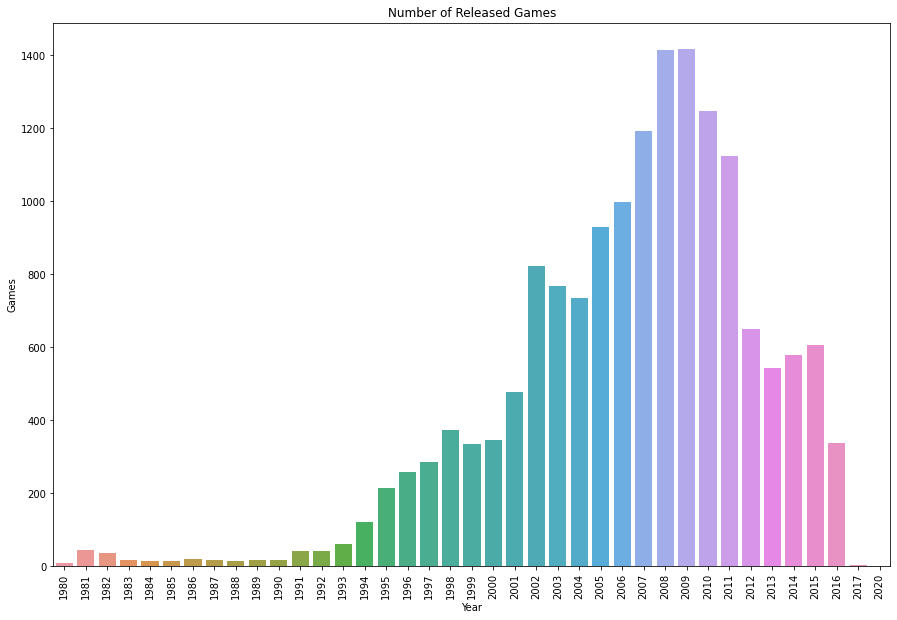

In [32]:
g_count = df_copy.groupby(by=['Year'])['Name'].count()
g_count = g_count.reset_index()

plt.figure(figsize=(15,10))
g_count_plot = sns.barplot(x='Year', y='Name', data = g_count);
g_count_plot.set(xlabel ="Year", ylabel = "Games", title ='Number of Released Games')
plt.xticks(rotation=90);

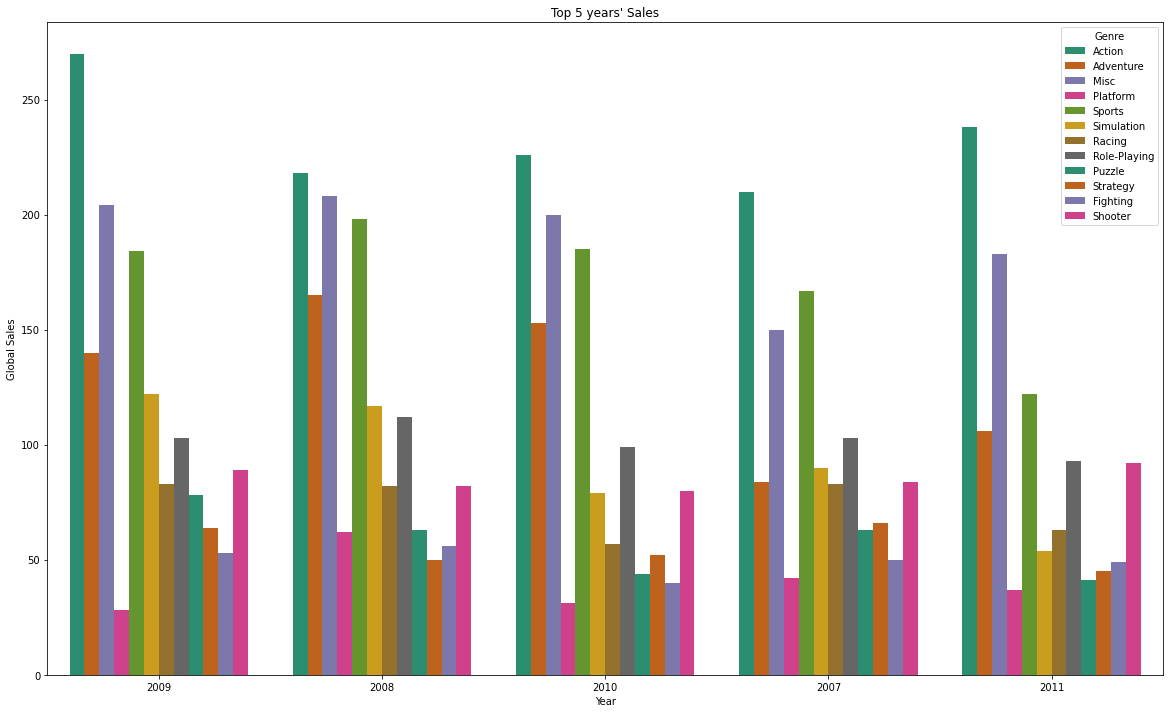

In [33]:
plt.figure(figsize=(20,12))
y_genre_plot = sns.countplot(x='Year', data=df_copy, hue='Genre', order=df_copy.Year.value_counts().iloc[:5].index, palette='Dark2')
y_genre_plot.set(xlabel ="Year", ylabel = "Global Sales", title ="Top 5 years' Sales");

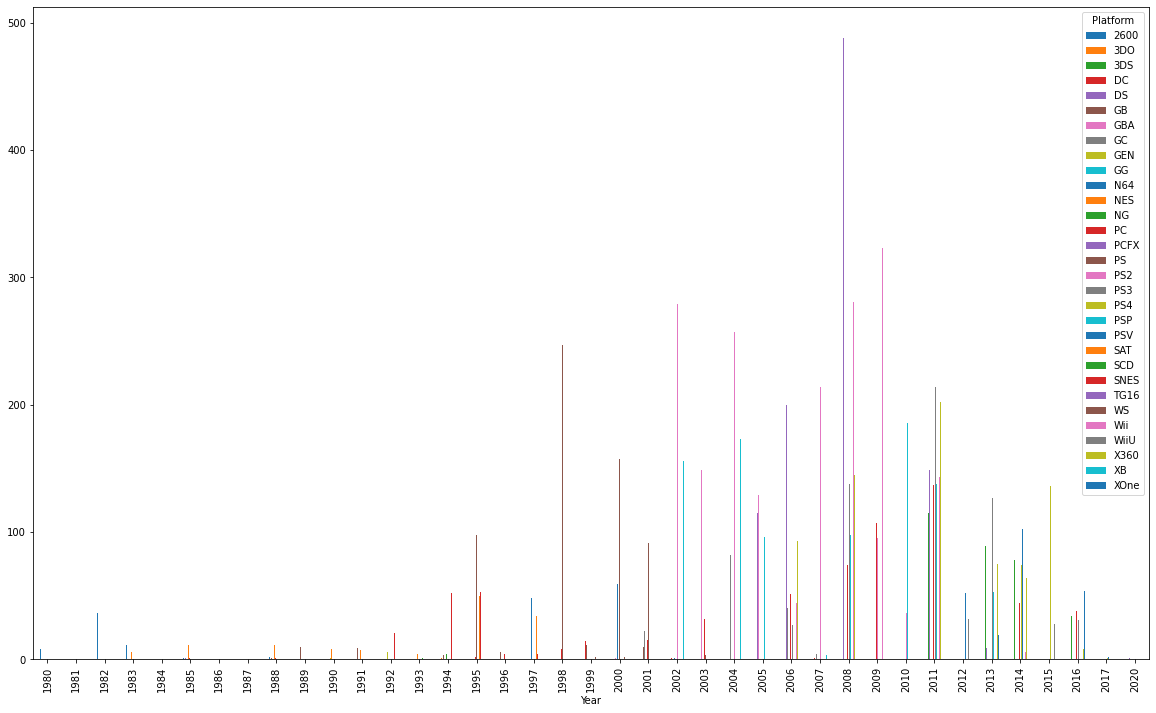

In [34]:
y_platform = df_copy.groupby(by='Year')['Platform'].value_counts().unstack()
ax = y_platform.plot(kind='bar', figsize=(20,12))

In [35]:
game_08_16 = df_copy.query('2008 <= Year <= 2016').reset_index()


In [36]:
df_copy.Platform.value_counts()[:5]


DS      2111
PS2     2109
PS3     1291
Wii     1279
X360    1226
Name: Platform, dtype: int64

In [37]:
m_platforms = ['DS','PS2','PS3','Wii','X360']
main_platforms = game_08_16.query('Platform in @m_platforms')

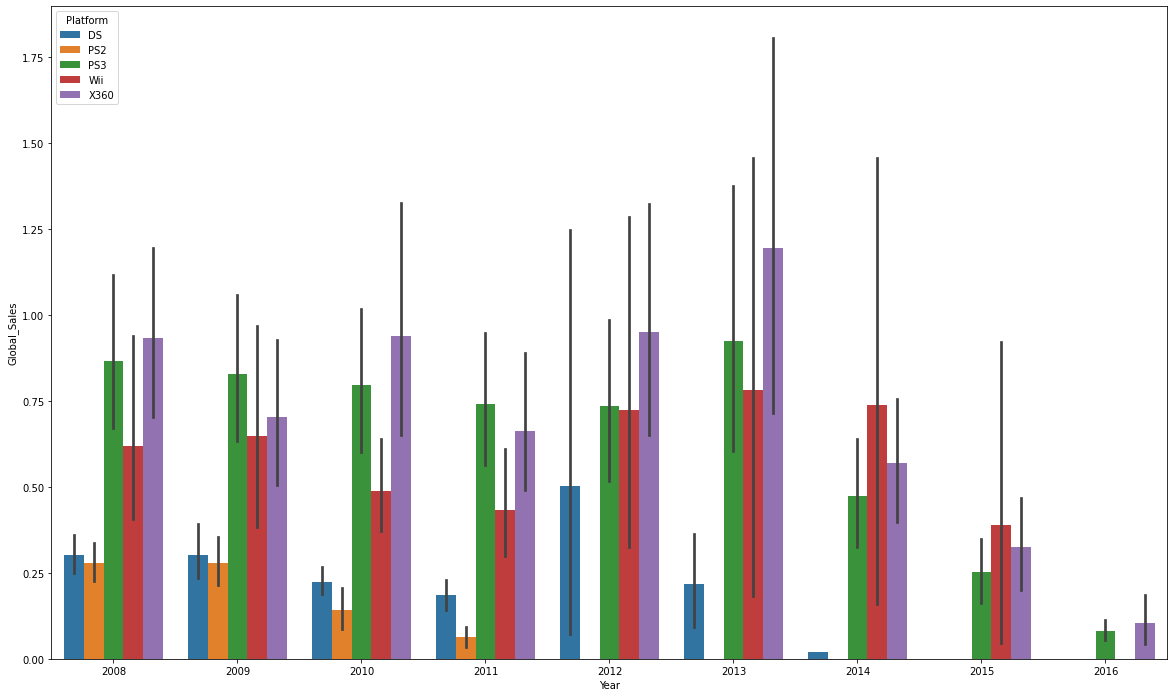

In [38]:
plt.figure(figsize=(20,12))
sns.barplot(x='Year', y='Global_Sales', hue='Platform',data=main_platforms, hue_order = m_platforms)

In [39]:
top_sales = df_copy.sort_values(by='Rank')
top_1000 = top_sales.iloc[:1000,:]
top_1000.Publisher.value_counts()[:7]

Nintendo                       229
Electronic Arts                150
Sony Computer Entertainment     86
Activision                      80
Ubisoft                         53
Take-Two Interactive            52
Microsoft Game Studios          38
Name: Publisher, dtype: int64

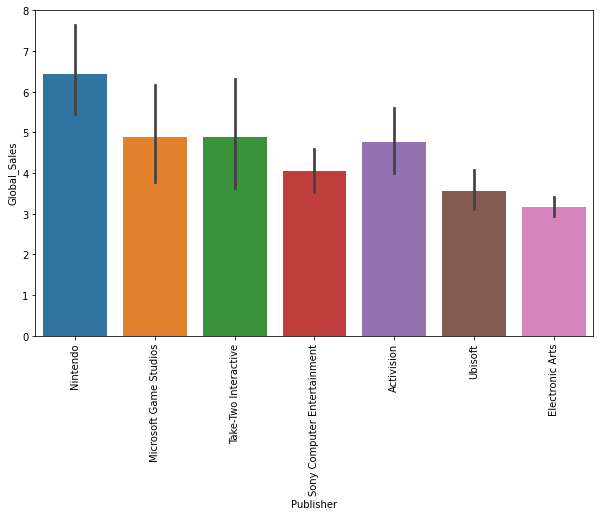

In [40]:
m_pulisher = ['Nintendo','Electronic Arts','Sony Computer Entertainment','Activision','Ubisoft','Take-Two Interactive','Microsoft Game Studios']
main_publisher = top_1000.query('Publisher in @m_pulisher')

pub_sales = main_publisher[['Publisher','Global_Sales']]
pub_sales = pub_sales.groupby('Publisher')['Global_Sales'].sum()
pub_sales = pd.DataFrame(pub_sales).reset_index()

plt.figure(figsize=(10,6))
sns.barplot(x='Publisher',y='Global_Sales',data=main_publisher);
plt.xticks(rotation=90);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

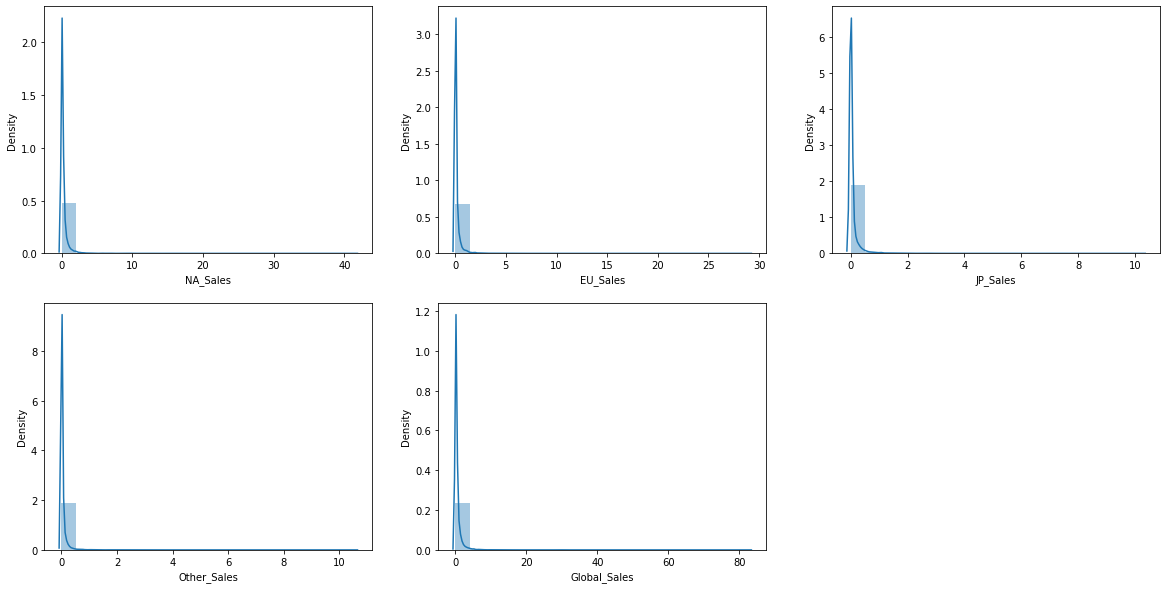

In [41]:
plt.figure(figsize=(20,10));
sales_column = ['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']

for i, column in enumerate(sales_column):
  plt.subplot(2,3,i+1);
  sns.distplot(df_copy[column],bins=20, kde=True);

In [42]:
df_log = df_copy.copy()

df_log = df_log[df_log.NA_Sales !=0]
df_log = df_log[df_log.EU_Sales !=0]
df_log = df_log[df_log.JP_Sales !=0]
df_log = df_log[df_log.Other_Sales !=0]
df_log = df_log[df_log.Global_Sales !=0]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

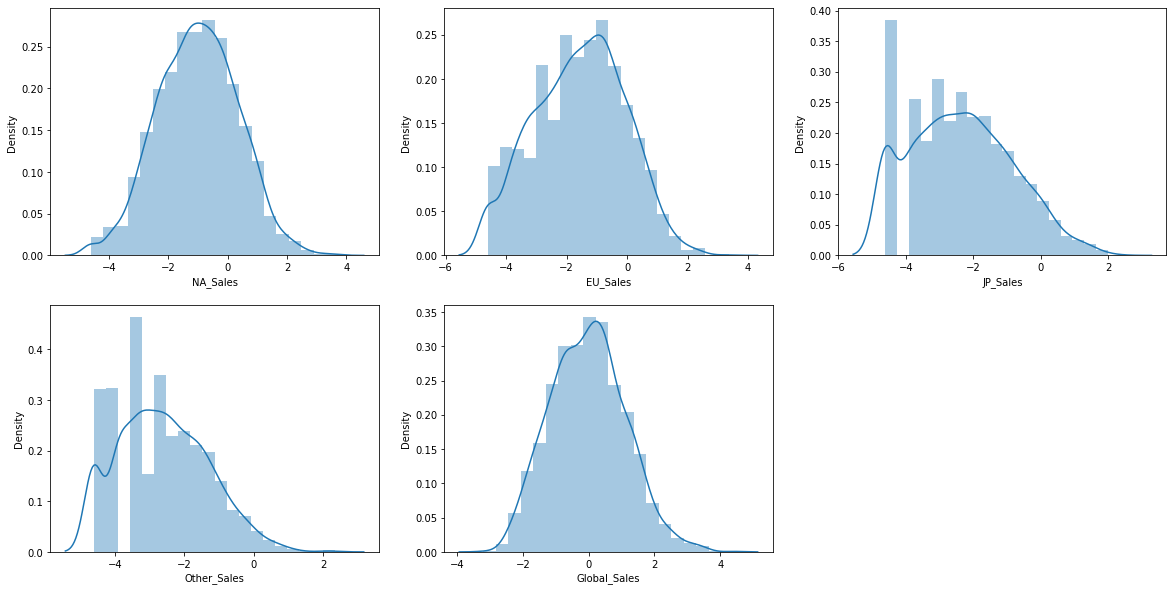

In [43]:
plt.figure(figsize=(20,10));
sales_column = ['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']

for i, column in enumerate(sales_column):
  plt.subplot(2,3,i+1);
  sns.distplot(np.log(df_log[column]),bins=20, kde=True);

In [51]:
df_cluster = df_copy.copy()

In [52]:
x = df_cluster.loc[:,'NA_Sales':'Other_Sales'].values

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(x)

df_cluster['Cluster'] = kmeans.labels_
df_cluster['Cluster'] = df_cluster['Cluster'].astype(str)

In [53]:
def convert(x):
  if x=='1':
    return 'high'
  elif x=='0':
    return 'low'
  elif x=='2':
    return 'medium'

In [54]:
df_cluster['Cluster'] = df_cluster['Cluster'].apply(convert)

In [55]:
df_cluster

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Cluster
1,13350,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04,low
2,7811,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18,low
3,14908,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02,low
4,13350,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04,low
5,6513,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25,low
...,...,...,...,...,...,...,...,...,...,...,...,...
16594,7404,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01,0.20,low
16595,15766,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01,low
16596,2543,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79,low
16597,4901,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03,0.38,low


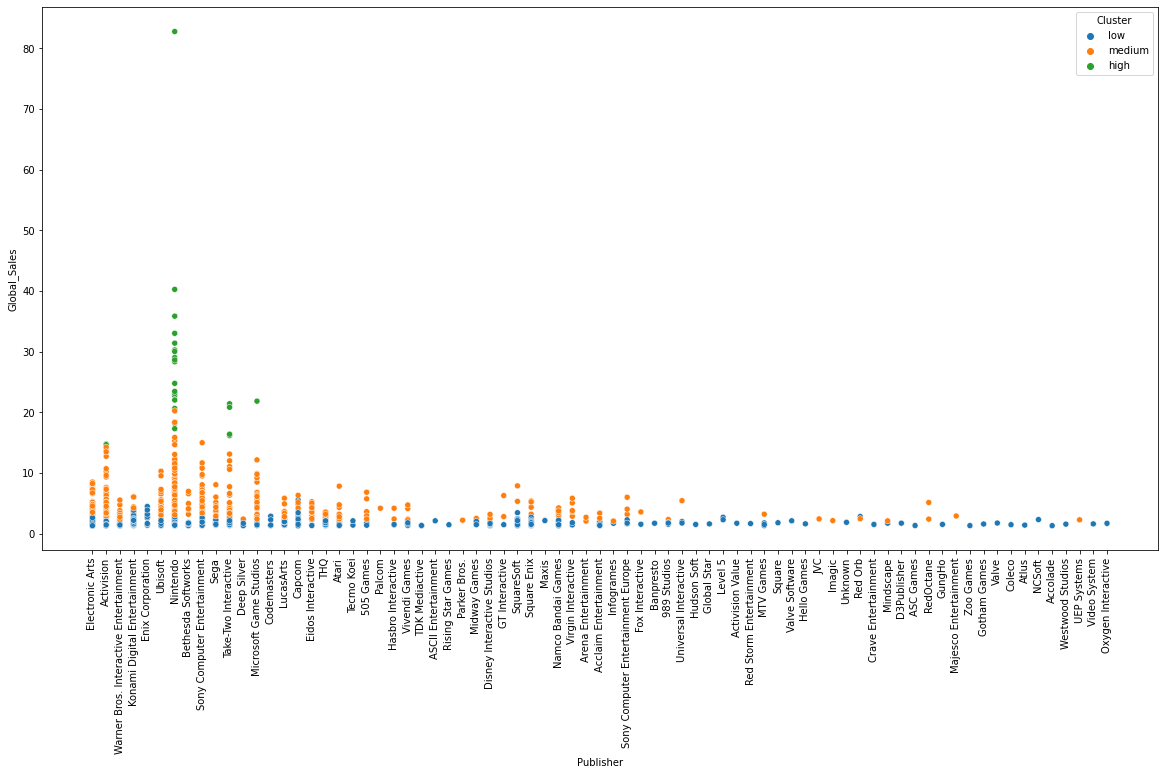

In [56]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90);
sns.scatterplot(data=df_cluster,x=df_cluster.sort_values(by='Global_Sales',ascending=False).Publisher[:1500],y=df_cluster.Global_Sales,hue=df_cluster.Cluster)

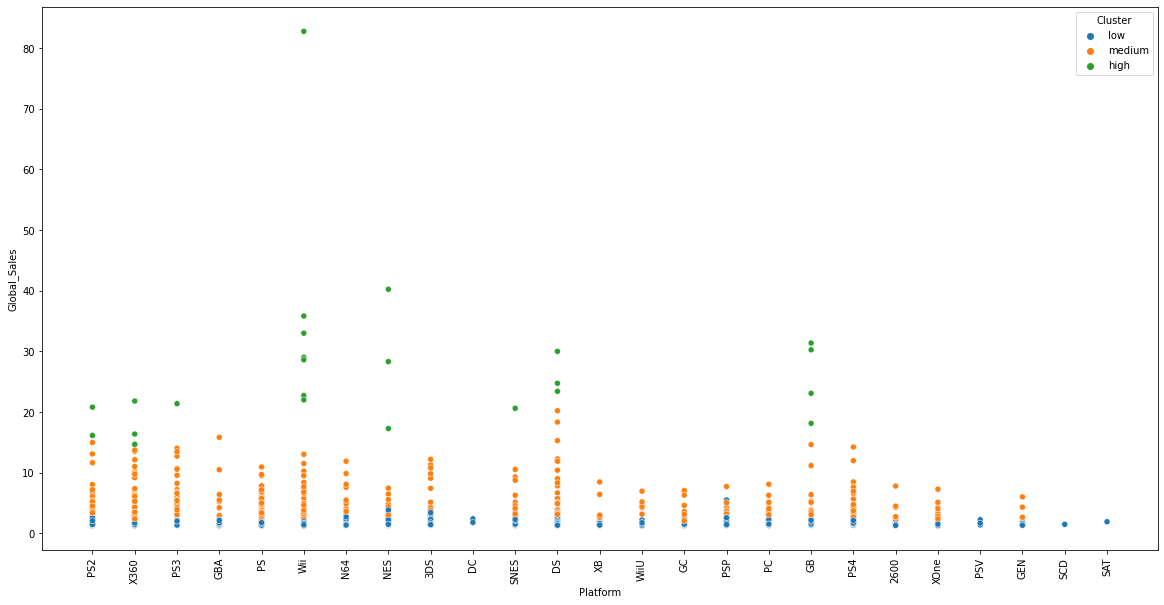

In [57]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90);
sns.scatterplot(data=df_cluster,x=df_cluster.sort_values(by='Global_Sales',ascending=False).Platform[:1500],y=df_cluster.Global_Sales,hue=df_cluster.Cluster)

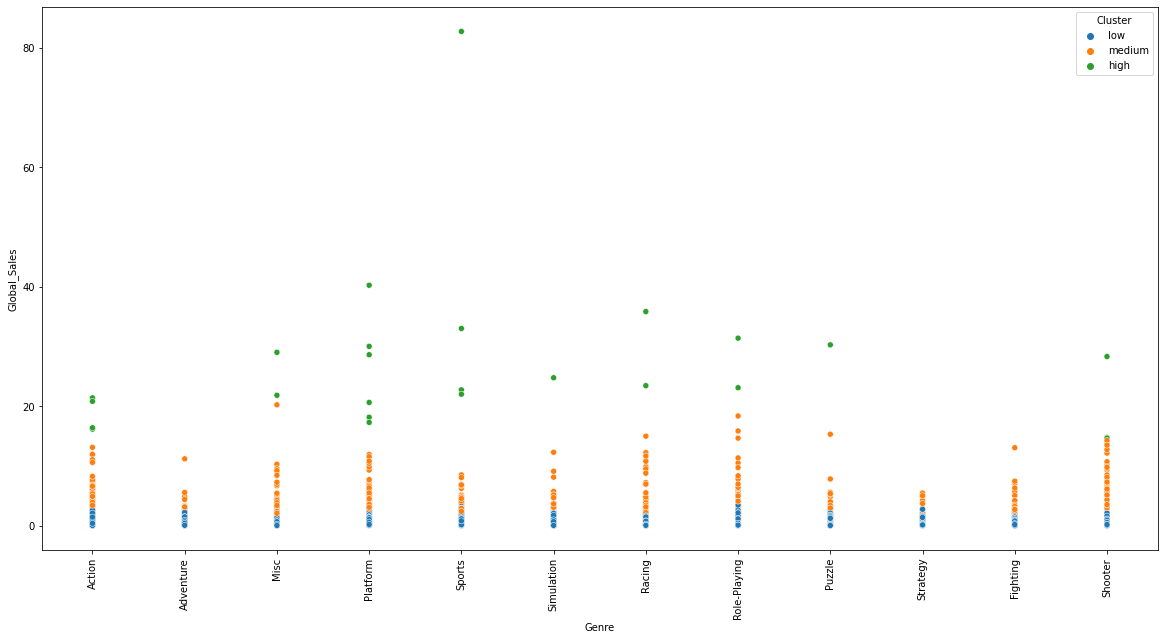

In [59]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90);
sns.scatterplot(data=df_cluster,x=df_cluster.sort_values(by='Global_Sales',ascending=False).Genre,y=df_cluster.Global_Sales,hue=df_cluster.Cluster)